In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
ticker = 'AAPL'
Apple= yf.download(ticker,start='2020-01-20',end='2024-01-20')
Apple = pd.DataFrame(Apple)
Apple.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-21,76.542618,77.134992,76.404797,76.692525,110843200
2020-01-22,76.815865,77.369552,76.721564,77.028631,101832400
2020-01-23,77.185776,77.265562,76.320173,76.869035,104472000
2020-01-24,76.963326,78.177095,76.772311,77.432394,146537600
2020-01-27,74.700218,75.382053,73.716142,74.968599,161940000


# Preprocessing steps


In [6]:
Apple.dropna()
Apple.drop_duplicates()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-21,76.542618,77.134992,76.404797,76.692525,110843200
2020-01-22,76.815865,77.369552,76.721564,77.028631,101832400
2020-01-23,77.185776,77.265562,76.320173,76.869035,104472000
2020-01-24,76.963326,78.177095,76.772311,77.432394,146537600
2020-01-27,74.700218,75.382053,73.716142,74.968599,161940000
...,...,...,...,...,...
2024-01-12,184.568390,185.382436,183.843701,184.707372,40444700
2024-01-16,182.295029,182.920438,179.614645,180.835714,65603000


#### Daily Returns


In [7]:
Apple['Daily_returns'] = Apple['Close'].pct_change()

In [8]:
#doing log return as it has better balance for returns

Apple['Log_returns'] =  np.log(Apple['Close']/Apple['Close'].shift(1))

Volatility: Rolling standard deviation

In [9]:
Apple['Volatility_10'] = Apple['Daily_returns'].rolling(window=10).std()


Moving Averages

calculating both moving average, and also estimated moving average, as ema gives current weight more weight, the lesser the span value, the more importance it gives to that day

In [10]:
Apple['MA_10'] = Apple['Close'].rolling(window=10).mean()
Apple['EMA_10'] = Apple['Close'].ewm(span=10, adjust=False).mean()


. RSI (Relative Strength Index)


realtive strength index 7030

In [11]:
import ta
Apple['RSI'] = ta.momentum.RSIIndicator(close=Apple['Close'].squeeze()).rsi()


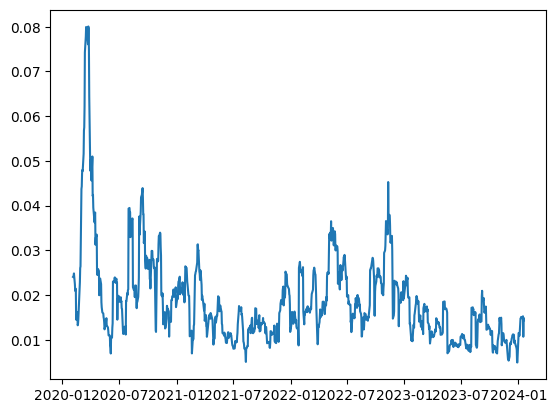

In [12]:
plt.plot(Apple['Volatility_10'])

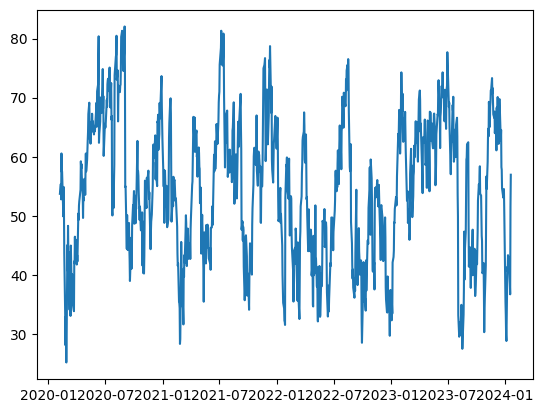

In [13]:
plt.plot(Apple['RSI'])

moving average convergence divergence macd . macd above signal line, bullish, optimistic, below , bearish , not optimistic

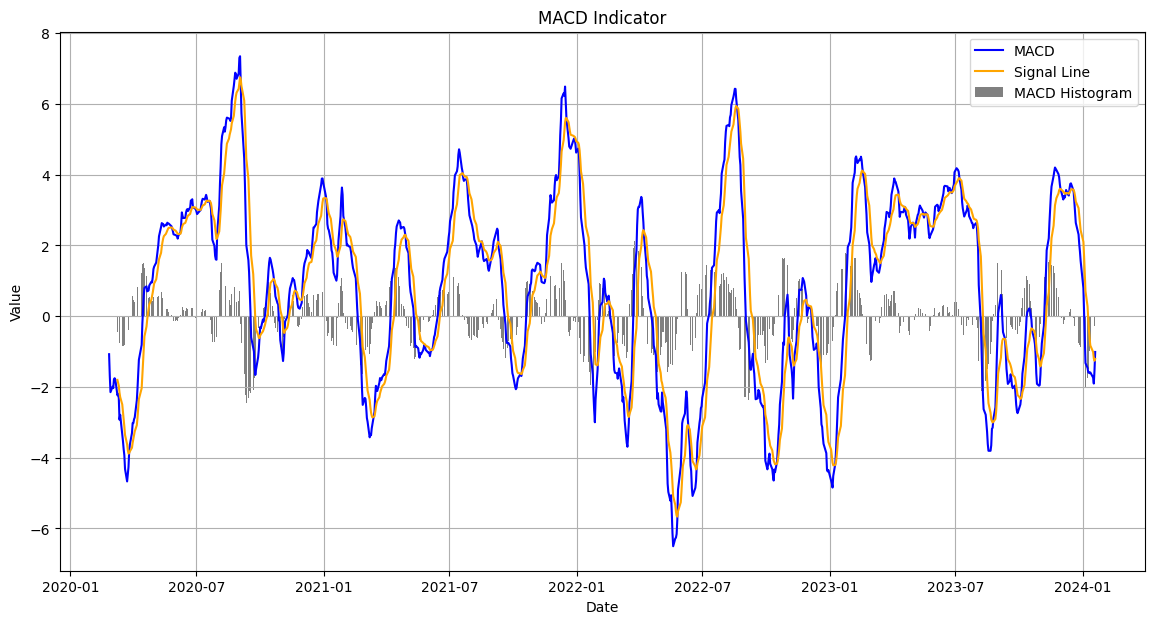

In [14]:
macd = ta.trend.MACD(close=Apple['Close'].squeeze())
Apple['MACD'] = macd.macd()
Apple['MACD_Signal'] = macd.macd_signal()
Apple['MACD_Diff'] = macd.macd_diff()  # Histogram

plt.figure(figsize=(14, 7))
plt.plot(Apple['MACD'], label='MACD', color='blue')
plt.plot(Apple['MACD_Signal'], label='Signal Line', color='orange')
plt.bar(Apple.index, Apple['MACD_Diff'], label='MACD Histogram', color='gray')
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Moving average 

bollinger's band

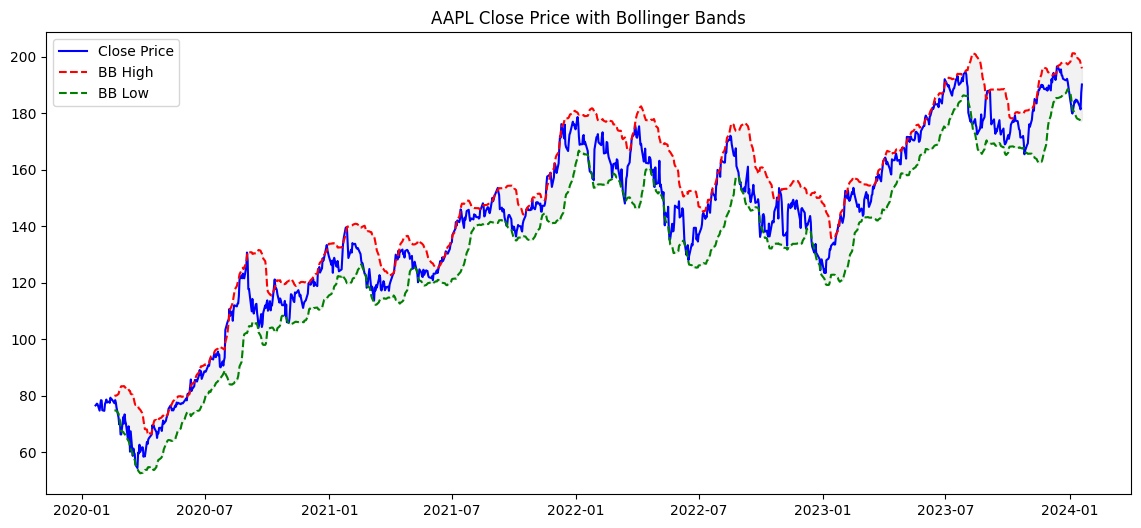

In [15]:
boll = ta.volatility.BollingerBands(close=Apple['Close'].squeeze())
Apple['BB_High'] = boll.bollinger_hband()
Apple['BB_Low'] = boll.bollinger_lband()
Apple['BB_Mid'] = boll.bollinger_mavg()

# === Plot Close Price and Bollinger Bands ===
plt.figure(figsize=(14, 6))
plt.plot(Apple['Close'], label='Close Price', color='blue')
plt.plot(Apple['BB_High'], label='BB High', linestyle='--', color='red')
plt.plot(Apple['BB_Low'], label='BB Low', linestyle='--', color='green')
plt.fill_between(Apple.index, Apple['BB_Low'], Apple['BB_High'], color='gray', alpha=0.1)
plt.title('AAPL Close Price with Bollinger Bands')
plt.legend()
plt.show()


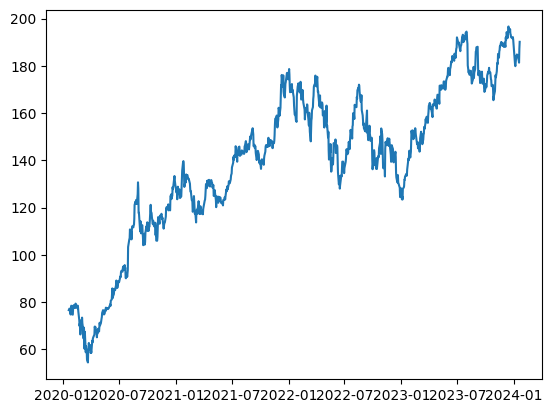

In [16]:
plt.plot(Apple['Close'])

In [17]:
df = pd.DataFrame([1,2,3,4])
print(df.rolling(window=1))

Rolling [window=1,center=False,axis=0,method=single]


In [18]:
Apple.head()

Price,Close,High,Low,Open,Volume,Daily_returns,Log_returns,Volatility_10,MA_10,EMA_10,RSI,MACD,MACD_Signal,MACD_Diff,BB_High,BB_Low,BB_Mid
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,
2020-01-21,76.542618,77.134992,76.404797,76.692525,110843200,NaN,NaN,NaN,NaN,76.542618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,76.815865,77.369552,76.721564,77.028631,101832400,0.003570,0.003564,NaN,NaN,76.592299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,77.185776,77.265562,76.320173,76.869035,104472000,0.004816,0.004804,NaN,NaN,76.700204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,76.963326,78.177095,76.772311,77.432394,146537600,-0.002882,-0.002886,NaN,NaN,76.748044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,74.700218,75.382053,73.716142,74.968599,161940000,-0.029405,-0.029846,NaN,NaN,76.375712,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#create a corelation heatmap

data_corr = Apple.corr(numeric_only=True)

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

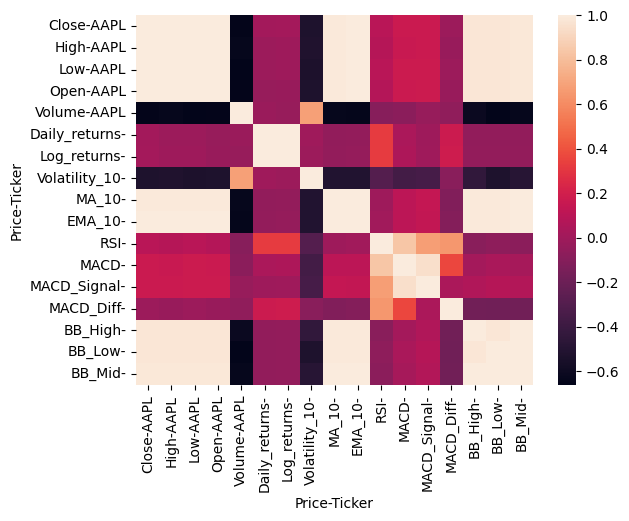

In [20]:
import seaborn as sns

sns.heatmap(data_corr,cmap='rocket')

for time series analysis, 

In [21]:
data = Apple.copy()

doing a adfuller test, fitting a regressin model to get the results 

In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(Apple['Close'])

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -1.520143862035271
p-value: 0.523523970094864


p value is more than 0.05, so the data is not statinoary, we have to make it stationary

Differencing


In [23]:
data = Apple.copy()
data[('Diff_1', '')] = data[('Close', 'AAPL')].diff()
data = data.dropna(subset=[('Diff_1', '')])

# ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(data[('Diff_1', '')])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -32.82418022618807
p-value: 0.0


still the p value shows the data is still not stationary, doing a second order differencing

In [24]:
# data['Diff_2'] = data['Diff_1'] - data['Diff_1'].shift(1)

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = ARIMA(data['Diff_1'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 5 days
forecast = model_fit.forecast(steps=5)
print(forecast)

c:\Users\gratu\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gratu\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gratu\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1006    0.014035
1007    0.116339
1008    0.112723
1009    0.112851
1010    0.112847
Name: predicted_mean, dtype: float64


c:\Users\gratu\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gratu\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
sarima_model = SARIMAX(data['Diff_1'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()
print(sarima_fit.aic,sarima_fit.bic)

# Forecast next 5 days
sarima_forecast = sarima_fit.forecast(steps=5)
print(sarima_forecast)


c:\Users\gratu\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gratu\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


4807.064585325889 4831.568238646115
1006   -0.175952
1007   -0.289610
1008    0.432654
1009   -0.136921
1010   -0.095697
Name: predicted_mean, dtype: float64


c:\Users\gratu\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gratu\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [27]:
data.head()

Price,Close,High,Low,Open,Volume,Daily_returns,Log_returns,Volatility_10,MA_10,EMA_10,RSI,MACD,MACD_Signal,MACD_Diff,BB_High,BB_Low,BB_Mid,Diff_1
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,
2020-01-22,76.815865,77.369552,76.721564,77.028631,101832400,0.003570,0.003564,NaN,NaN,76.592299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.273247
2020-01-23,77.185776,77.265562,76.320173,76.869035,104472000,0.004816,0.004804,NaN,NaN,76.700204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.369911
2020-01-24,76.963326,78.177095,76.772311,77.432394,146537600,-0.002882,-0.002886,NaN,NaN,76.748044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.222450
2020-01-27,74.700218,75.382053,73.716142,74.968599,161940000,-0.029405,-0.029846,NaN,NaN,76.375712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.263107
2020-01-28,76.813423,76.985090,75.483593,75.582726,162234000,0.028289,0.027896,NaN,NaN,76.455296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.113205


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Prepare your data
data = data.copy()

# Target: predict the next day's Close price
data['Target'] = data['Close'].shift(-1)

# Drop any rows with missing values
data.dropna(inplace=True)


# Step 2: Select features (drop target and other unnecessary columns)
# Make sure to drop only columns that exist in your DataFrame
columns_to_drop = ['Target']  # Drop only the target column
features = data.drop(columns=columns_to_drop)  # X
target = data['Target']  # y

# Step 3: Time-based Train-Test Split
split_index = int(len(data) * 0.8)
X_train = features.iloc[:split_index]
X_test = features.iloc[split_index:]
y_train = target.iloc[:split_index]
y_test = target.iloc[split_index:]

#printing shapes



model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

#
latest_data = features.iloc[[-1]]  
next_day_prediction = model.predict(latest_data)
print("Predicted Close Price for Next Day:", next_day_prediction[0])


Mean Squared Error on Test Set: 106.43704942034631
Predicted Close Price for Next Day: 173.5920849609375


In [29]:
print(type(data['Close']))
print(data['Close'].shape)

<class 'pandas.core.frame.DataFrame'>
(973, 1)
